<a href="https://colab.research.google.com/github/asdcxz916/Project/blob/main/dogs_and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
DIRECTORY = r'/content/drive/MyDrive/Colab Notebooks/datasets/dogs_cats/training_set'

CATEGORIES = ['cats', 'dogs']

In [ ]:
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)
        if img_path.endswith(".jpg"):
          label = CATEGORIES.index(category)
          arr = cv2.imread(img_path)
          arr=cv2.cvtColor(arr,cv2.COLOR_BGR2GRAY)
          new_arr = cv2.resize(arr, (100, 100))
          data.append([new_arr, label])


100%|██████████| 4005/4005 [19:34<00:00,  3.41it/s]


In [ ]:
import random

random.shuffle(data)

In [ ]:
len(data)

8005

In [ ]:
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

In [ ]:
import pickle
pickle.dump(X, open('/content/drive/MyDrive/Colab Notebooks/datasets/dogs_cats/savemodels/pikle/X.pkl', 'wb'))
pickle.dump(y, open('/content/drive/MyDrive/Colab Notebooks/datasets/dogs_cats/savemodels/pikle/y.pkl', 'wb'))

In [ ]:
import pickle

X = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/datasets/dogs_cats/savemodels/pikle/X.pkl', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/datasets/dogs_cats/savemodels/pikle/y.pkl', 'rb'))



In [ ]:
len(X)

8005

In [ ]:
data

[[array([[44, 67, 47, ..., 54, 98, 63],
         [71, 95, 73, ..., 62, 50, 65],
         [56, 81, 77, ..., 68, 64, 39],
         ...,
         [39, 42, 38, ..., 56, 55, 55],
         [39, 37, 39, ..., 58, 53, 57],
         [38, 41, 39, ..., 56, 53, 57]], dtype=uint8), 1],
 [array([[ 94,  94,  82, ...,  44,  88, 235],
         [ 65,  63,  75, ...,  51,  91, 224],
         [ 72,  75,  78, ...,  36,  72, 230],
         ...,
         [115, 117,  95, ..., 105,  98, 114],
         [ 85, 115, 111, ...,  45,  87,  65],
         [ 78,  61, 104, ...,  69,  99,  77]], dtype=uint8), 0],
 [array([[64, 64, 64, ..., 68, 68, 69],
         [64, 64, 64, ..., 70, 68, 70],
         [63, 63, 64, ..., 73, 71, 68],
         ...,
         [73, 70, 78, ..., 84, 76, 67],
         [72, 76, 81, ..., 88, 66, 62],
         [89, 85, 91, ..., 82, 57, 51]], dtype=uint8), 0],
 [array([[111, 116, 115, ..., 111, 114, 137],
         [116, 117, 117, ..., 122, 101, 114],
         [112, 126, 117, ..., 121,  94, 145],
       

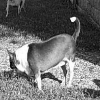

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[23])

In [ ]:
#X=list(X)
y=np.reshape(y,-1)
X=np.divide(X,255)
X = np.reshape(X, (-1,100,100 ,1))


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
calsfier=Sequential();
calsfier.add(Convolution2D(32,(7,7),input_shape=(100,100,1),activation='relu'))
calsfier.add(MaxPool2D(input_shape=(2,2)))
calsfier.add(Convolution2D(64,(5,5),activation='relu'))
calsfier.add(MaxPool2D(input_shape=(2,2)))
calsfier.add(Convolution2D(128,(3,3),activation='relu'))
calsfier.add(MaxPool2D(input_shape=(2,2)))
calsfier.add(Flatten())
calsfier.add(Dense(128,activation='relu'))
calsfier.add(Dense(64,activation='relu'))
calsfier.add(Dense(32,activation='relu'))
calsfier.add(Dense(1,activation='sigmoid'))
calsfier.compile(optimizer='adam',loss ='binary_crossentropy',metrics= ['accuracy'])
calsfier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 32)        1600      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 43, 43, 64)        51264     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 19, 19, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10368)            

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(16, 7, activation='relu', input_shape=(100, 100, 1)))
model.add(Conv2D(16, 7, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 5, activation='relu'))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 94, 94, 16)        800       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 88, 88, 16)        12560     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 44, 44, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 40, 40, 32)        12832     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 36, 36, 32)        25632     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=.33,random_state=3)




In [ ]:
X_val.shape

(2642, 100, 100, 1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint ,EarlyStopping ,CSVLogger
checkpoint=ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/datasets/dogs_cats/savemodels",monitor='val_loss',mode='min',save_best_only=True,save_weights_only=True,varbose=1
                           )



In [ ]:
calsfier.fit(

    X_train, y_train,

    validation_data=(X_val, y_val),

    steps_per_epoch=60,

    epochs=50,
    validation_steps=150
    ,

    callbacks=[checkpoint]

)

Epoch 1/50
60/60 [==============================] - 115s 2s/step - loss: 0.6933 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4951
Epoch 2/50
60/60 [==============================] - 100s 2s/step - loss: 0.6931 - accuracy: 0.5083
Epoch 3/50
60/60 [==============================] - 99s 2s/step - loss: 0.6932 - accuracy: 0.5038
Epoch 4/50
60/60 [==============================] - 100s 2s/step - loss: 0.6932 - accuracy: 0.5013
Epoch 5/50
60/60 [==============================] - 100s 2s/step - loss: 0.6933 - accuracy: 0.4910
Epoch 6/50
60/60 [==============================] - 100s 2s/step - loss: 0.6931 - accuracy: 0.5090
Epoch 7/50
60/60 [==============================] - 100s 2s/step - loss: 0.6932 - accuracy: 0.4979
Epoch 8/50
60/60 [==============================] - 100s 2s/step - loss: 0.6932 - accuracy: 0.4995
Epoch 9/50
60/60 [==============================] - 101s 2s/step - loss: 0.6932 - accuracy: 0.4903
Epoch 10/50
60/60 [==============================] - 102s 2s/step - 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(100, 100))
  x = image.img_to_array(img)
  new_arr = np.array(x)
  new_arr = new_arr.reshape(-1, 100, 100, 1)
  calsfier.predict_classes(new_arr)
  classes =[2] 
  print(classes[0])
  if classes[0]==0:
    
    print(fn + " is cat")
    
  else:
    
    print(fn + " is dog ")

Saving 205535230_3079054338995630_8360775964005524773_n.jpg to 205535230_3079054338995630_8360775964005524773_n.jpg


InvalidArgumentError: ignored

In [ ]:
import numpy as np
CATEGORIES = ['Cat', 'Dog']


def image(path):
    img = cv2.imread(path)
    new_arr = cv2.resize(img,(100,100))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 100, 100, 3)
    return new_arr


ac=calsfier.predict([image('/content/sample_data/dog/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg')])
print(ac)
prediction = calsfier.predict_classes([image('/content/sample_data/dog/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg')])
print(CATEGORIES[prediction.argmax()])

[[1.]]
Cat


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
